In [35]:
import pandas as pd
import numpy as np
import nltk
import re
import matplotlib.pyplot as plt

In [16]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

In [2]:
dataset = pd.read_csv("IMDB Dataset.csv")
dataset.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
# Initial Data Processing
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [5]:
# Checking duplicate
dataset.drop_duplicates(keep="first", inplace=True)

In [6]:
dataset.shape

(49582, 2)

In [8]:
labels = {"negative" : 0, "positive" : 1}

# Feature and Target
X = dataset.review
Y = dataset.sentiment

target = Y.replace(labels).to_numpy()

/tmp/ipykernel_116059/283642269.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  target = Y.replace(labels).to_numpy()


In [9]:
target

array([1, 1, 1, ..., 0, 0, 0], shape=(49582,))

## Text Processing

In [24]:
def text_processor(text):
    text = text.lower()

    # Removing urls 
    text = re.sub(r'(https?://\S+|www\.\S+)', "", text)
    # Removing HTML Tags
    text = re.sub(r"<.*?>", "", text)
    # Puncuation and special Char
    text = re.sub(r"[^\w\d\s]", " ", text)
    # Remove spaces
    text = text.strip()

    # Stopwords
    text = [word for word in text.split() if word not in ENGLISH_STOP_WORDS]
    text = " ".join(text)
    
    # Lemmatization
    text = lemmatizer.lemmatize(text)

    return text
    

In [27]:
cleaned_feature = X.apply(text_processor).to_numpy()

In [33]:
# Visualization

#!pip install wordcloud

from wordcloud import WordCloud

cloud = WordCloud(
    colormap="winter", max_words=100, width=500, height=300
)
image = cloud.generate(" ".join(cleaned_feature[:10]))

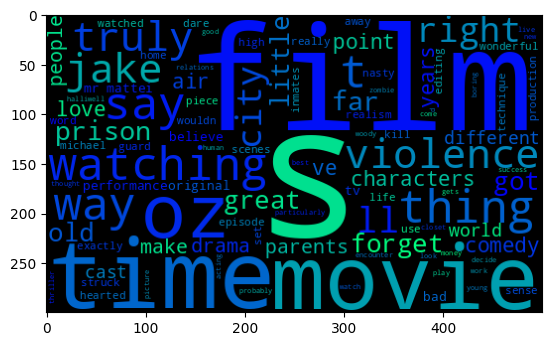

In [36]:
plt.imshow(image)